# Result Notebook

This notebook is used for seeing what the model is producing

In [1]:
import tensorflow as tf
import os

from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

import model as model

/home/colten/.virtualenvs/tfenv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)

# Args for the training data generator. Both x and y should be identical,
# so they are put into a tuple
generator_args = dict(target_size=(96, 96),
                      batch_size=32,
                      class_mode=None,
                      color_mode='rgb',
                      seed=1)

generator_x = train_datagen.flow_from_directory(
        'bin/validate/compressed/', **generator_args)

generator_y = train_datagen.flow_from_directory(
        'bin/validate/uncompressed/', **generator_args)

Found 229 images belonging to 1 classes.
Found 229 images belonging to 1 classes.


In [3]:
# We must construct the model and load the pre-trained weights
model = model.get_model()
model.load_weights('weight_checkpoints/weights.hdf5')
#model.load_weights('weights.h5')

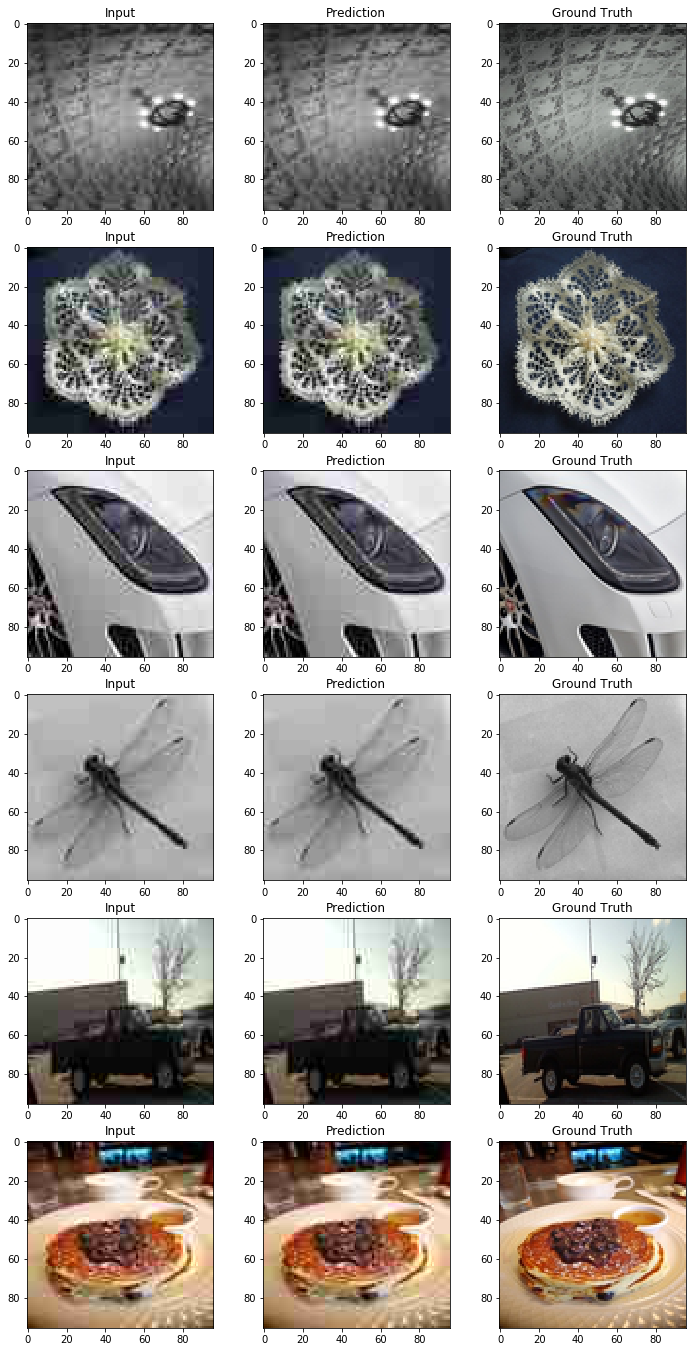

In [4]:
thing_x = generator_x.next()
thing_y = generator_y.next()
prediction = model.predict(thing_x)
    
fig = plt.figure(figsize=(12, 24))
fig.set_facecolor('white')

def plotpart(row, total_rows):
    def plot(tensor, n, title):
        ax = plt.subplot(total_rows, 3, n + 3*row)
        plt.title(title)
        plt.imshow(tensor.reshape(96, 96, 3))
        #plt.gray()
        ax.get_xaxis().set_visible(True)
        ax.get_yaxis().set_visible(True)
        
    plot(thing_x[row], 1, 'Input')
    plot(prediction[row], 2, 'Prediction')
    plot(thing_y[row], 3, 'Ground Truth')
    
for i in range(6):
    plotpart(i, 6)
    
plt.show()